In [4]:
!pip install fredapi > /dev/null

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'e9f47363ce8f4ab799e077644273e226'

In [6]:
# Creating Fred Object
fred = Fred(api_key=fred_key)
fred

In [7]:
# Searching for Data
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-02-18   2023-02-18   
CSUSHPINSA          CSUSHPINSA     2023-02-18   2023-02-18   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-02-18   2023-02-18   
SP500                    SP500     2023-02-18   2023-02-18   
CSUSHPISA            CSUSHPISA     2023-02-18   2023-02-18   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
SP500                                                     S&P 500   
CSUSHPISA         S&P/Case-Shiller U.S. National Home Price Index   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-02-16  Daily, Close   
CSUSHPINSA            1987-01-01      2022-11-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2023-02-16  Daily, Close   
SP500                 2013-02-19      2023-02-17  Daily, Close   
CSUSHPISA             1987-01-01      2022-11-01       Monthly   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
BAMLH0A0HYM2EY               D             Percent                   %   
SP500                        D               Index               Index   
CSUSHPISA                    M  Index Jan 2000=100  Index Jan 2000=100   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
CSUSHPISA           Seasonally Adjusted                        SA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2023-02-17 09:22:17-06:00         94   
CSUSHPINSA      2023-01-31 08:01:02-06:00         90   
BAMLH0A0HYM2EY  2023-02-17 09:22:16-06:00         84   
SP500           2023-02-17 19:10:50-06:00         84   
CSUSHPISA       2023-01-31 08:01:04-06:00         81   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
SP500           The observations for the S&P 500 represent the...  
CSUSHPISA       For more information regarding the index, plea...

<AxesSubplot:title={'center':'S&P500'}>

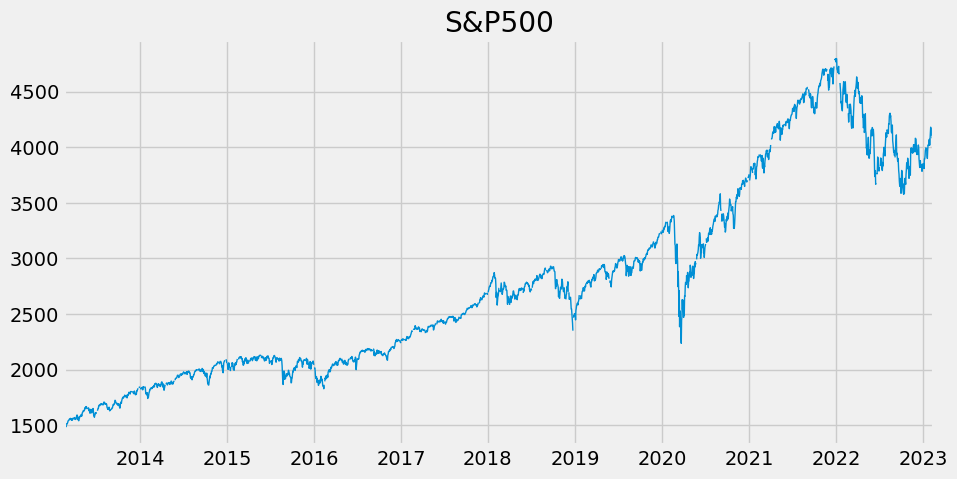

In [8]:
#Pulling raw data and plotting
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title='S&P500', lw=1)

In [20]:
#Searching and for data series with unemployment rate
unemp_df = fred.search('unemployment rate state', filter=('units', 'Percent'))
unemp_df = unemp_df.query('frequency=="Monthly" & seasonal_adjustment=="Seasonally Adjusted"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]
unemp_df.head()

id realtime_start realtime_end                            title  \
series id                                                                      
CAUR       CAUR     2023-02-18   2023-02-18  Unemployment Rate in California   
FLUR       FLUR     2023-02-18   2023-02-18     Unemployment Rate in Florida   
NYUR       NYUR     2023-02-18   2023-02-18    Unemployment Rate in New York   
TXUR       TXUR     2023-02-18   2023-02-18       Unemployment Rate in Texas   
OHUR       OHUR     2023-02-18   2023-02-18        Unemployment Rate in Ohio   

          observation_start observation_end frequency frequency_short  \
series id                                                               
CAUR             1976-01-01      2022-12-01   Monthly               M   
FLUR             1976-01-01      2022-12-01   Monthly               M   
NYUR             1976-01-01      2022-12-01   Monthly               M   
TXUR             1976-01-01      2022-12-01   Monthly               M   
OHUR             1976-01-01      2022-12-01   Monthly               M   

             units units_short  seasonal_adjustment seasonal_adjustment_short  \
series id                                                                       
CAUR       Percent           %  Seasonally Adjusted                        SA   
FLUR       Percent           %  Seasonally Adjusted                        SA   
NYUR       Percent           %  Seasonally Adjusted                        SA   
TXUR       Percent           %  Seasonally Adjusted                        SA   
OHUR       Percent           %  Seasonally Adjusted                        SA   

                        last_updated popularity notes  
series id                                              
CAUR       2023-01-25 08:27:02-06:00         57  None  
FLUR       2023-01-25 08:27:02-06:00         51  None  
NYUR       2023-01-25 08:26:02-06:00         48  None  
TXUR       2023-01-25 08:26:03-06:00         48  None  
OHUR       2023-01-25 08:26:04-06:00         41  None

In [10]:
#Joining series into one dataframe

all_results=[]

for my_id in unemp_df.index:
    results = fred.get_series(my_id)
    results = results.to_frame(name=my_id)
    all_results.append(results)

unemp_results = pd.concat(all_results, axis=1)
unemp_results

CAUR  FLUR  NYUR  TXUR  OHUR  MIUR  NCUR  ILUR  PAUR  ALUR  AKUR  \
1976-01-01   9.2   9.7  10.3   5.8   8.1   9.9   6.4   6.6   8.0   6.6   7.1   
1976-02-01   9.2   9.7  10.3   5.8   8.1   9.9   6.4   6.6   8.1   6.6   7.1   
1976-03-01   9.1   9.6  10.2   5.9   8.1   9.9   6.4   6.6   8.1   6.6   7.0   
1976-04-01   9.1   9.5  10.2   5.9   8.0   9.8   6.3   6.6   8.1   6.5   6.9   
1976-05-01   9.0   9.3  10.1   5.9   7.8   9.6   6.1   6.6   8.1   6.4   6.9   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2022-08-01   4.1   2.7   4.7   4.1   4.0   4.1   3.5   4.5   4.2   2.6   4.6   
2022-09-01   3.8   2.5   4.3   4.0   4.0   4.1   3.6   4.5   4.1   2.6   4.4   
2022-10-01   4.0   2.7   4.3   4.0   4.2   4.2   3.8   4.6   4.0   2.7   4.5   
2022-11-01   4.1   2.6   4.3   4.0   4.2   4.3   3.9   4.7   4.0   2.7   4.5   
2022-12-01   4.1   2.5   4.3   3.9   4.2   4.3   3.9   4.7   3.9   2.8   4.3   

            MAUR  COUR  WIUR  VAUR  GAUR  NJUR  WAUR  TNUR  MNUR  WVUR  INUR  \
1976-01-01  10.5   5.8   5.8   6.1   8.4  10.3   8.5   6.0   6.0   7.5   6.6   
1976-02-01  10.5   5.7   5.8   6.1   8.4  10.3   8.5   6.0   6.0   7.5   6.6   
1976-03-01  10.5   5.7   5.7   6.1   8.4  10.3   8.4   6.0   5.9   7.5   6.5   
1976-04-01  10.3   5.6   5.6   6.0   8.3  10.3   8.5   6.0   5.8   7.5   6.3   
1976-05-01  10.1   5.6   5.5   5.9   8.1  10.3   8.5   5.9   5.7   7.4   6.0   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2022-08-01   3.6   3.4   3.1   2.6   2.8   4.0   3.7   3.4   1.9   3.9   2.8   
2022-09-01   3.4   3.4   3.2   2.6   2.8   3.3   3.7   3.4   2.0   4.0   2.8   
2022-10-01   3.5   3.6   3.3   2.7   2.9   3.4   3.8   3.5   2.1   4.0   3.0   
2022-11-01   3.4   3.5   3.3   2.8   3.0   3.4   4.0   3.5   2.3   4.1   3.0   
2022-12-01   3.3   3.3   3.2   3.0   3.0   3.4   4.2   3.5   2.5   4.1   3.1   

            OKUR  KYUR  AZUR  NMUR  MOUR  NVUR  ARUR  SCUR  IAUR  LAUR  UTUR  \
1976-01-01   5.8   5.6  10.2   8.6   5.9   9.2   7.3   7.4   4.3   6.3   5.8   
1976-02-01   5.8   5.6  10.2   8.7   5.9   9.2   7.3   7.4   4.3   6.3   5.9   
1976-03-01   5.8   5.6  10.1   8.7   5.9   9.2   7.3   7.3   4.3   6.3   5.8   
1976-04-01   5.8   5.6  10.0   8.6   6.0   9.0   7.2   7.2   4.2   6.4   5.8   
1976-05-01   5.7   5.5   9.8   8.6   6.0   8.9   7.1   7.0   4.1   6.5   5.7   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2022-08-01   3.1   3.8   3.5   4.4   2.5   4.4   3.4   3.1   2.6   3.5   2.0   
2022-09-01   3.2   3.8   3.7   4.2   2.4   4.4   3.5   3.2   2.7   3.4   2.1   
2022-10-01   3.4   3.9   3.9   4.3   2.6   4.6   3.6   3.3   2.9   3.3   2.1   
2022-11-01   3.4   4.0   4.1   4.1   2.7   4.9   3.7   3.3   3.1   3.3   2.2   
2022-12-01   3.4   4.0   4.0   3.9   2.8   5.2   3.6   3.3   3.1   3.5   2.2   

            MDUR  LASMT261982000000003  ORUR  HIUR  PRUR  NDUR  \
1976-01-01   6.4                   NaN   9.5   9.8  19.6   3.4   
1976-02-01   6.4                   NaN   9.5   9.8  19.5   3.4   
1976-03-01   6.4                   NaN   9.4   9.8  19.3   3.4   
1976-04-01   6.4                   NaN   9.2   9.7  19.0   3.5   
1976-05-01   6.5                   NaN   9.1   9.4  18.9   3.6   
...          ...                   ...   ...   ...   ...   ...   
2022-08-01   4.3                   3.8   3.7   4.0   5.8   2.3   
2022-09-01   4.0                   3.7   3.8   3.5   NaN   2.2   
2022-10-01   4.5                   3.6   4.1   3.3   NaN   2.3   
2022-11-01   4.3                   3.6   4.3   3.3   NaN   2.3   
2022-12-01   4.0                   3.7   4.5   3.2   NaN   2.3   

            LASMT391746000000003  MSUR  NEUR  KSUR  DCUR  MEUR  MTUR  CTUR  \
1976-01-01                   NaN   6.7   3.3   4.2   8.7   8.7   5.8   9.8   
1976-02-01                   NaN   6.7   3.3   4.2   8.7   8.7   5.8   9.8   
1976-03-01                   NaN   6.6   3.3   4.2   8.6   8.6   5.8   9.8   
1976-04-01              

In [11]:
#Dropping columns with not matching data
for col in unemp_results.columns:
    if len(col)>4:
        unemp_results = unemp_results.drop(columns=col, axis=1)
unemp_states = unemp_results.copy()
unemp_states.shape


(564, 52)

In [12]:
#Changing the columns label
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]


In [13]:
#Plotting unemployment rate in every state
px.line(unemp_states, title='Unemployment Rate in Every State')

Text(0.5, 1.0, 'Unemployment Rate in May, 2020')

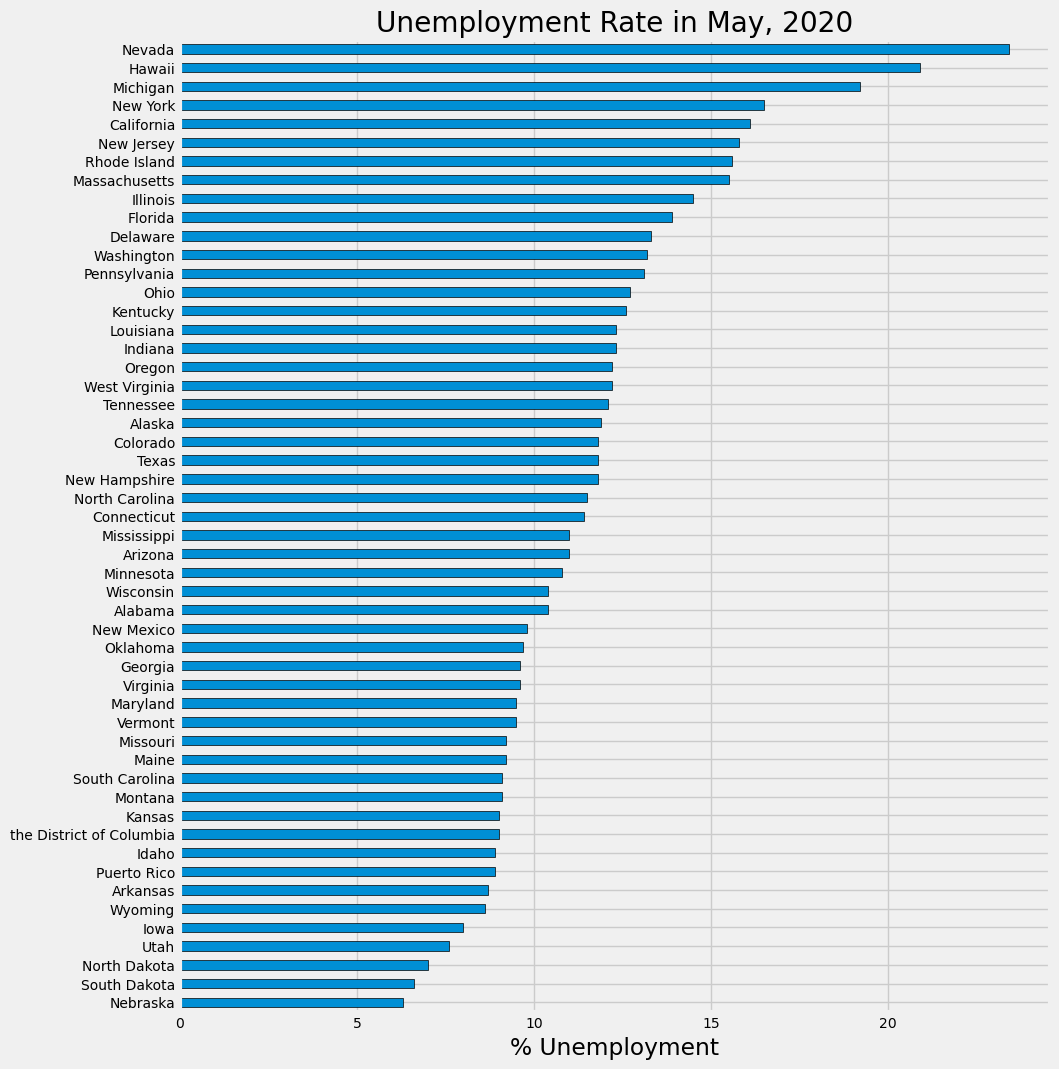

In [14]:
#Plotting unemployment rate in May, 2020
april_2020 = unemp_states[unemp_states.index=='2020-05-01'].T
ax = april_2020.sort_values('2020-05-01').plot(figsize=(10,12), \
                                                kind='barh', \
                                                edgecolor='black', \
                                                title = 'Unemployment Rate in May, 2020', \
                                                fontsize=10)
ax.legend().remove()
ax.set_xlabel('% Unemployment')
ax.set_title('Unemployment Rate in May, 2020')

In [16]:
#Pulling data with participation rate
part_df = fred.search('participation rate state', filter=('units', 'Percent'))
part_df = part_df.query('frequency=="Monthly" & seasonal_adjustment=="Seasonally Adjusted"')
part_df = part_df.loc[part_df['title'].str.contains('Participation Rate for')]

#Joining series into one dataframe
all_results=[]
for my_id in part_df.index:
    results = fred.get_series(my_id)
    results = results.to_frame(name=my_id)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)

#Changing the columns label
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

part_states

California  Wisconsin  Alabama  Florida  Ohio  Minnesota  \
1976-01-01        62.6       65.6     57.0     55.8  61.7       65.6   
1976-02-01        62.4       65.5     56.9     55.7  61.7       65.5   
1976-03-01        62.2       65.4     56.8     55.5  61.7       65.4   
1976-04-01        62.2       65.4     56.8     55.5  61.6       65.4   
1976-05-01        62.3       65.5     56.8     55.4  61.6       65.5   
...                ...        ...      ...      ...   ...        ...   
2022-08-01        62.5       65.9     57.2     59.5  61.8       68.2   
2022-09-01        62.3       65.6     57.2     59.5  61.7       68.1   
2022-10-01        62.3       65.3     57.2     59.6  61.5       68.0   
2022-11-01        62.2       64.9     57.1     59.5  61.3       67.9   
2022-12-01        62.1       64.7     57.0     59.5  61.2       67.9   

            Kentucky  Michigan  Texas  New York  Massachusetts  \
1976-01-01      60.5      61.6   63.8      58.0           64.8   
1976-02-01      60.3      61.5   63.5      58.0           64.7   
1976-03-01      60.2      61.5   63.4      58.0           64.6   
1976-04-01      60.1      61.6   63.5      58.0           64.6   
1976-05-01      60.1      61.7   63.6      58.1           64.6   
...              ...       ...    ...       ...            ...   
2022-08-01      58.0      60.1   63.8      60.5           65.8   
2022-09-01      58.0      60.1   63.6      60.3           65.6   
2022-10-01      57.9      60.0   63.6      60.5           65.5   
2022-11-01      57.7      59.9   63.5      60.5           65.3   
2022-12-01      57.6      59.9   63.5      60.5           65.1   

            North Carolina  Utah  Colorado  Tennessee  Indiana  New Mexico  \
1976-01-01            66.5  62.8      67.2       59.6     64.0        60.8   
1976-02-01            66.3  62.6      67.0       59.4     63.9        60.5   
1976-03-01            66.2  62.5      66.8       59.3     63.8        60.3   
1976-04-01            66.2  62.5      66.6       59.3     63.8        60.3   
1976-05-01            66.3  62.6      66.5       59.4     63.9        60.3   
...                    ...   ...       ...        ...      ...         ...   
2022-08-01            60.6  68.1      69.6       60.8     63.4        56.5   
2022-09-01            60.6  68.0      69.4       60.5     63.4        56.3   
2022-10-01            60.5  67.9      69.4       60.1     63.3        56.1   
2022-11-01            60.4  67.9      69.2       59.6     63.2        55.9   
2022-12-01            60.3  68.1      69.0       59.2     63.2        55.7   

            Maryland  Hawaii  Georgia  Iowa  Pennsylvania  Illinois  \
1976-01-01      64.3    69.9     63.7  64.4          58.4      63.0   
1976-02-01      64.2    69.6     63.6  64.3          58.3      63.0   
1976-03-01      64.1    69.6     63.5  64.2          58.3      62.9   
1976-04-01      64.1    69.4     63.5  64.1          58.3      62.9   
1976-05-01      64.1    69.3     63.6  64.1          58.3      63.0   
...              ...     ...      ...   ...           ...       ...   
2022-08-01      66.1    61.0     62.1  67.7          61.7      64.6   
2022-09-01      65.7    60.8     62.0  67.7          61.7      64.5   
2022-10-01      65.9    60.8     61.8  67.7          61.7      64.4   
2022-11-01      65.6    60.6     61.7  67.7          61.6      64.3   
2022-12-01      65.3    60.4     61.5  67.6          61.7      64.3   

            West Virginia  Louisiana  Nevada  Maine  Mississippi  Alaska  \
1976-01-01           52.5       56.8    71.3   62.1         58.8    69.0   
1976-02-01           52.4       56.6    70.8   61.9         58.6    68.4   
1976-03-01           52.3       56.5    70.5   61.9         58.5    67.8   
1976-04-01           52.3       56.4    70.4   61.8         58.5    67.9   
1976-05-01           52.2       56.4    70.5   61.7         58.5    67.9   
...                   ...        ...     ...    ...          ...     ...   
2022-08-01           55.2       

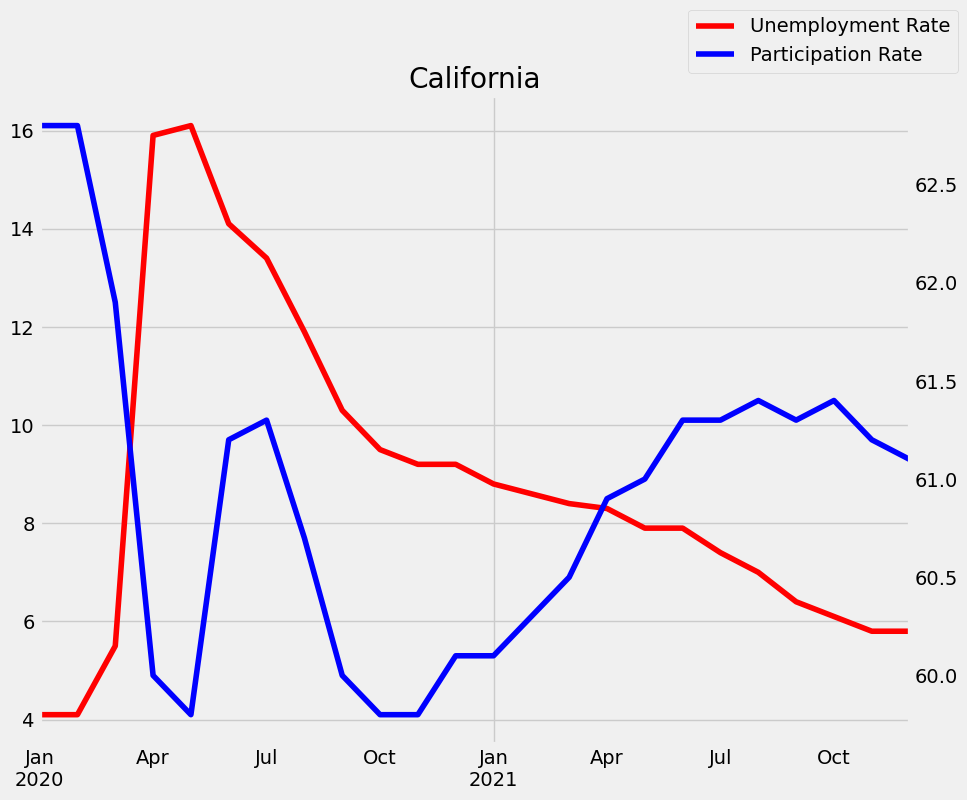

In [17]:
#plotting participation rate vs unemployment rate
fig, ax = plt.subplots(figsize=(10,8), sharex=True)
state = 'California'
ax2 = ax.twinx()
ax = unemp_states.query('index >= 2020 and index < 2022')[state]\
                        .plot(ax=ax, color='red', label='Unemployment Rate')
ax2 = part_states.query('index >= 2020 and index < 2022')[state]\
                        .plot(ax=ax2, color='blue', label='Participation Rate')
ax2.grid(False)
ax.set_title(state)
fig.legend()


In [18]:
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District of Columbia'})

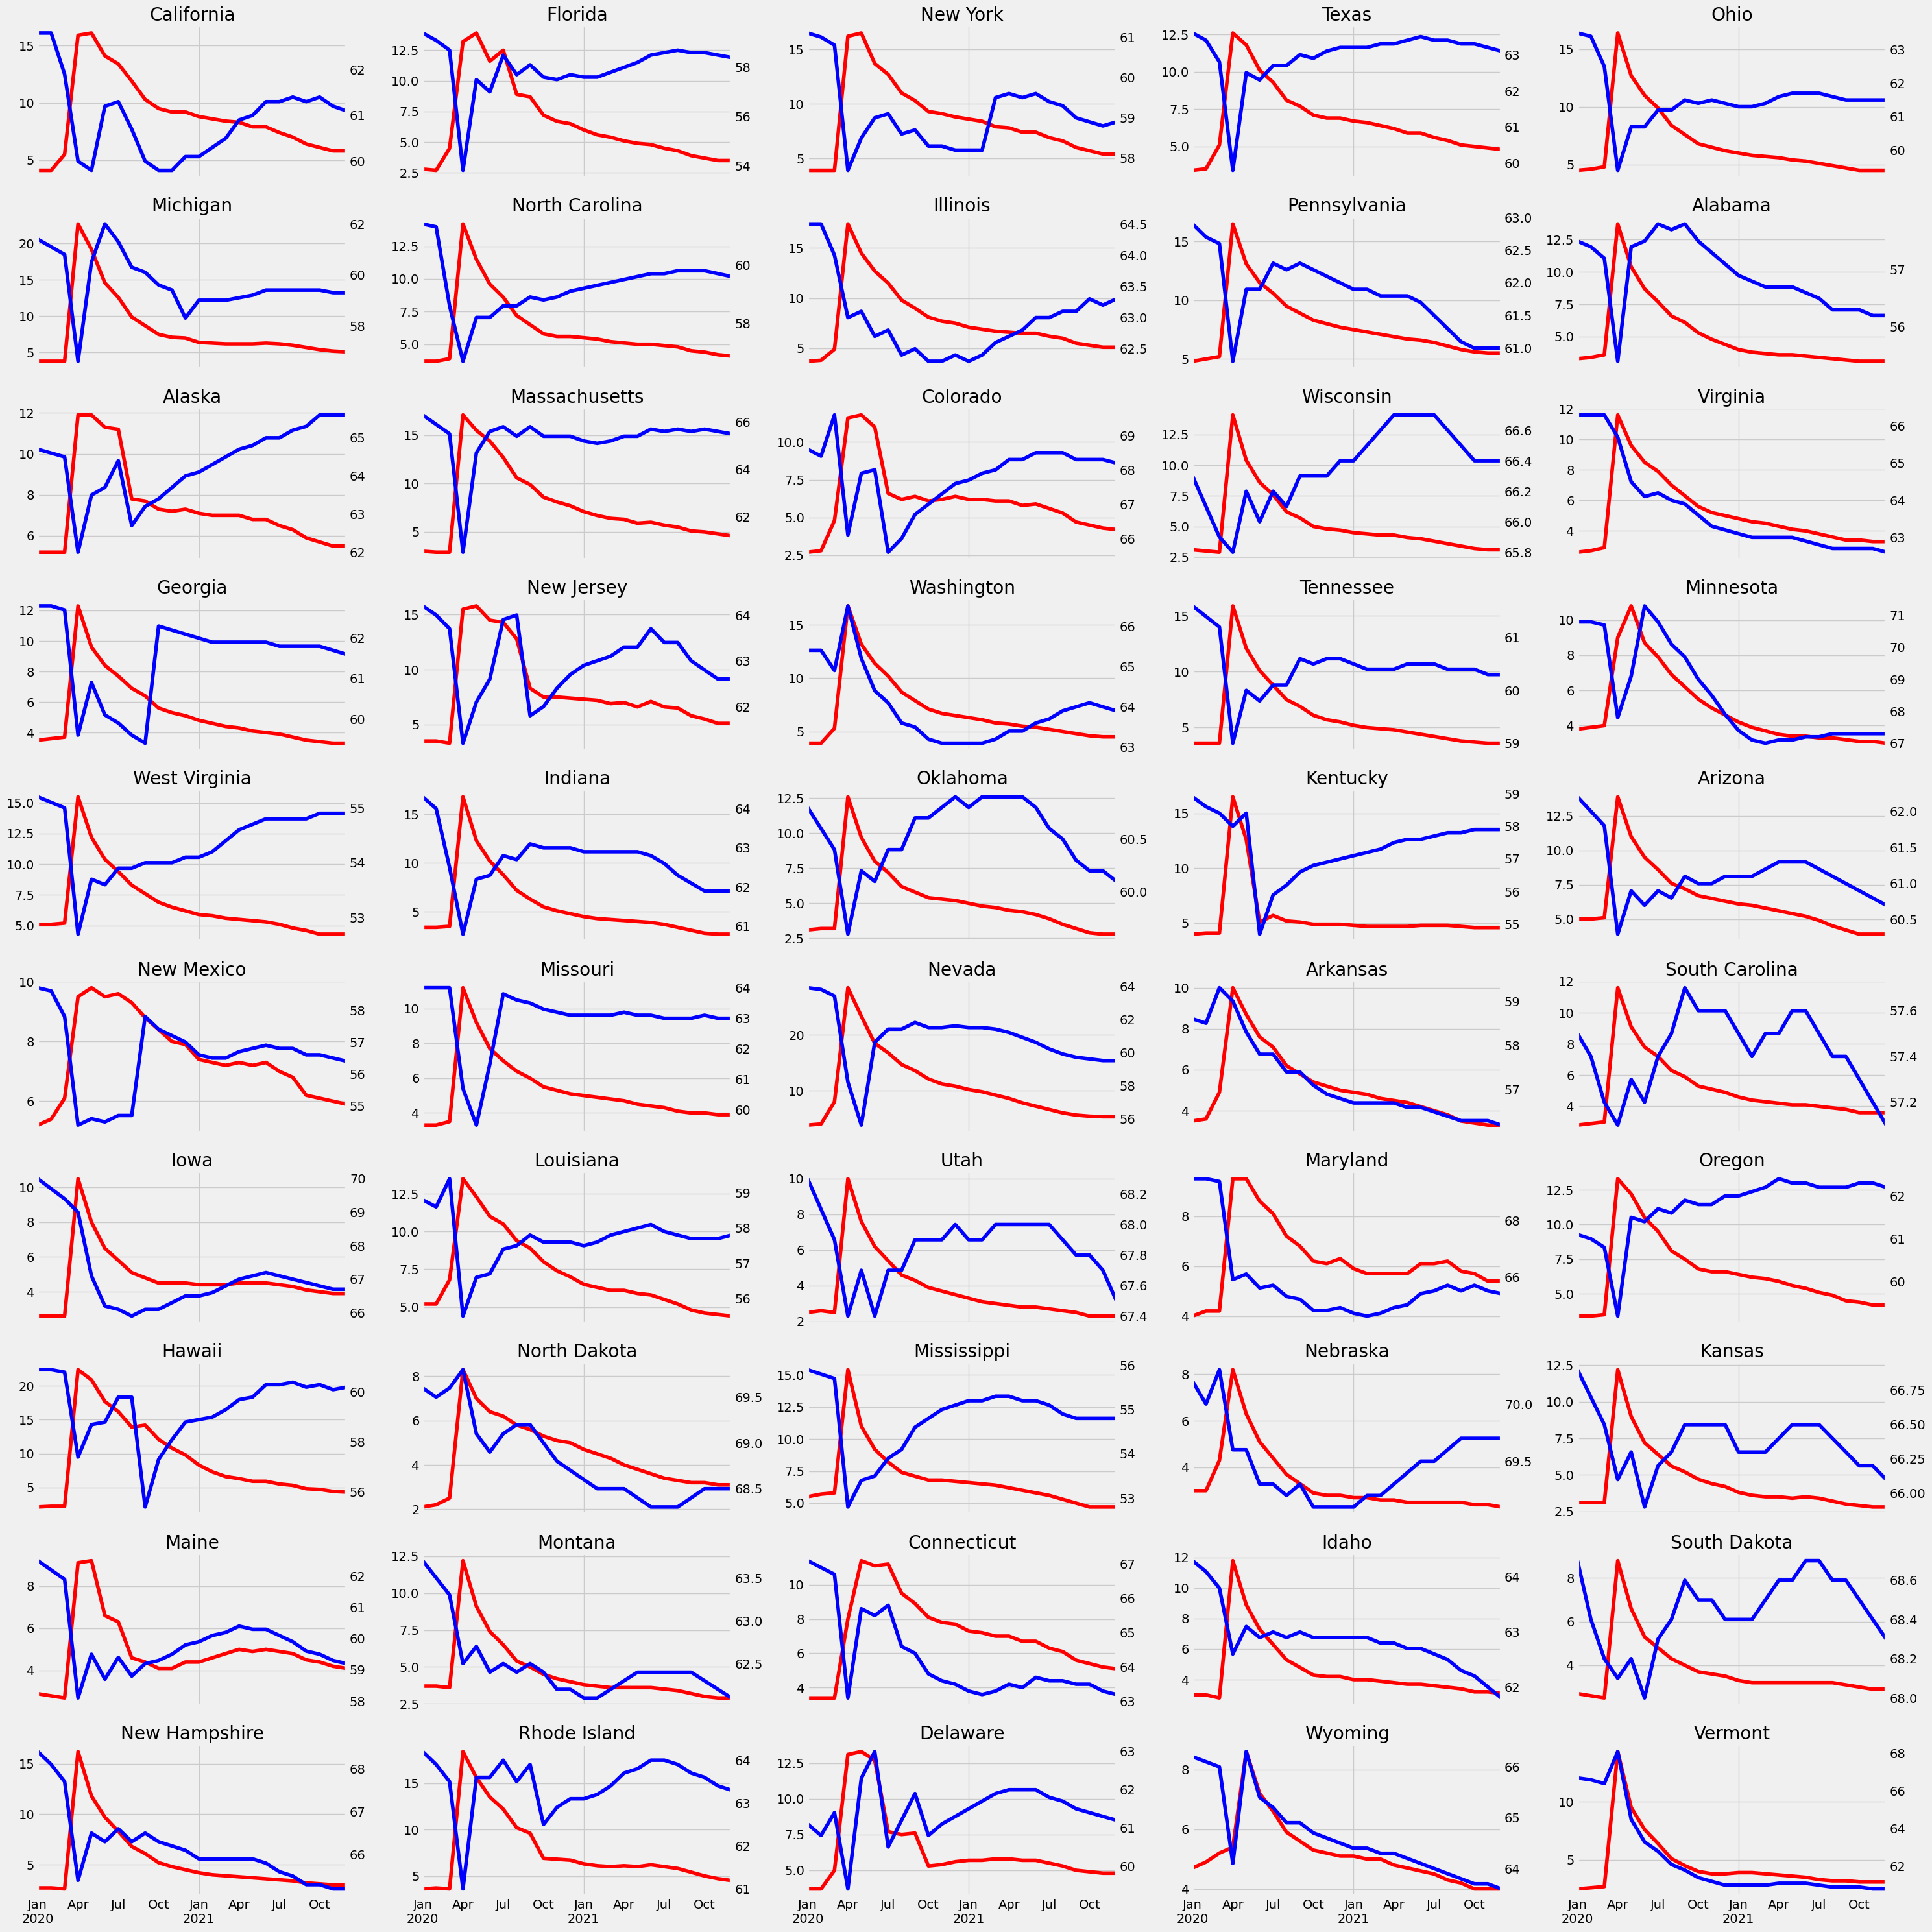

In [19]:
#plotting participation rate vs unemployment rate for every state
fig, axs = plt.subplots(10,5, figsize=(30,30), sharex=True)
axs = axs.flatten()
i=0
for state in unemp_states.columns:
    if state in ['District of Columbia', 'Puerto Rico']:
        continue
    ax2=axs[i].twinx()
    axs[i] = unemp_states.query('index >= 2020 and index < 2022')[state]\
                        .plot(ax=axs[i], color='red')
    ax2 = part_states.query('index >= 2020 and index < 2022')[state]\
                        .plot(ax=ax2, color='blue')
    ax2.grid(False)
    axs[i].set_title(state)
    i+=1
plt.tight_layout()